# Image generation example notebook

Google currently gives us at least two differente ways to generate an image:
- model: `imagen-3.0-generate-002` - but this requires **enabled billing**
- model: `gemini-2.0-flash-exp-image-generation` - which works well on a free tier

Below is the code to genreate an image with `gemini-2.0-flash-exp-image-generation`

<a target="_blank" href="https://colab.research.google.com/github/ontaptom/pjatk-workshop/blob/main/image_generation.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg">

## Install google-genai library

In [ ]:
%pip install -U -q google-genai

## Get imports and retrieve GOOGLE_API_KEY

key should already be visible in 'Secrets' section of your workbook
like this:

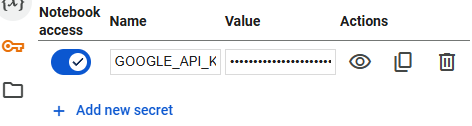

Use `Gemini API keys -> Import key from Google AI Studio` or manually add the secret.

In [ ]:
from google.colab import userdata
from PIL import Image
from io import BytesIO
import base64
from google import genai
from google.genai import types

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

## Initiate client using new google genai library

In [ ]:
client = genai.Client(api_key=GOOGLE_API_KEY)

In [ ]:
MODEL_ID = "gemini-2.0-flash-exp-image-generation"

# Generate an image - feel free to change the prompt

In [ ]:
prompt = "a closeup of a bumblebee looking at a coffee bean" # @param {type:"string"}

contents = (prompt)

response = client.models.generate_content(
    model=MODEL_ID,
    contents=contents,
    config=types.GenerateContentConfig(
      response_modalities=['Text', 'Image']
    )
)

# at this time response is  retrieved,
# the code below is saving file to .jpg
# and displays is on screen

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    image.save('gemini-native-image.png')
    display(image)

# Modify an existing image :)

### First we need to add our source image to colab

Import an image via Files (image.png) -> Upload to session storage (image.png)  

Menu available on left-hand side of colab!

Make sure you remember the image name (or rename it to something simple, no spaces etc.. ;) )

In [ ]:
prompt = "modify background of a picture to african safari" # @param {type:"string"}

filename = "update_me.jpg" # @param {type:"string"}
input_image = Image.open(filename)
display(input_image)  # display input image

contents = (input_image,prompt)

response = client.models.generate_content(
    model="gemini-2.0-flash-exp-image-generation",
    contents=contents,
    config=types.GenerateContentConfig(
      response_modalities=['Text', 'Image']
    )
)

# at this time response is  retrieved,
# the code below is saving file to .jpg
# and displays is on screen

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = Image.open(BytesIO((part.inline_data.data)))
    image.save('gemini-native-image.png')
    display(image)

## Text - Image chat!

more: check out: https://github.com/google-gemini/cookbook/blob/main/quickstarts/Image_out.ipynb for other examples

Below chat is kind of "experiment" and definitely not working super smooth ;)

Generally one executed place your request here:

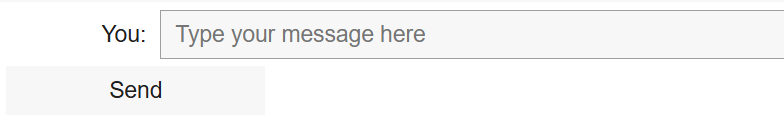

and the images will appear below. if you want to send another message (for instance modify the image), send your prompt in the same place, new image should appear within seconds below the previous one.

Again - prototype, sorry if it's not working smooth ;)


In [ ]:
# helper function to display both/either text & image in response
from IPython.display import display, Markdown, Image
import pathlib

def display_response(response):
  for part in response.candidates[0].content.parts:
    if part.text is not None:
      display(Markdown(part.text))
    elif part.inline_data is not None:
      mime = part.inline_data.mime_type
      print(mime)
      data = part.inline_data.data
      display(Image(data=data))

In [ ]:
chat = client.chats.create(
    model=MODEL_ID,
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)



In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create input widget, button, and output area
input_widget = widgets.Text(
    value='',
    placeholder='Type your message here',
    description='You:',
    layout=widgets.Layout(width='50%')
)
button = widgets.Button(description="Send")
output_area = widgets.Output()

# Define what happens when button is clicked
def on_button_clicked(b):
    with output_area:
        msg = input_widget.value
        if "exit" in msg:
            print("Exiting chat")
            return
        print(f"You: {msg}")  # Echo the input
        input_widget.value = ''  # Clear the input field
        response = chat.send_message(msg)
        display_response(response)
        print("Ready for next query")

# Connect button to function
button.on_click(on_button_clicked)

# Display the UI elements
display(widgets.VBox([input_widget, button, output_area]))